In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
file_path = "/Users/dhruvyadav/Desktop/Research/Manmeet Sir Research/AI NWS/Data Collection/gfs_1_week_data/gfs_2024-02-01.nc"  
ds = xr.open_dataset(file_path)

print(ds)

<xarray.Dataset> Size: 19kB
Dimensions:                               (time: 4, x: 10, y: 10)
Coordinates:
  * time                                  (time) datetime64[ns] 32B 2024-02-0...
  * x                                     (x) float64 80B -98.93 ... -96.91
  * y                                     (y) float64 80B 31.1 30.88 ... 29.08
    spatial_ref                           int64 8B ...
Data variables:
    temperature_2m_above_ground           (time, y, x) float64 3kB ...
    specific_humidity_2m_above_ground     (time, y, x) float64 3kB ...
    relative_humidity_2m_above_ground     (time, y, x) float64 3kB ...
    u_component_of_wind_10m_above_ground  (time, y, x) float64 3kB ...
    v_component_of_wind_10m_above_ground  (time, y, x) float64 3kB ...
    precipitable_water_entire_atmosphere  (time, y, x) float64 3kB ...
Attributes:
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    AREA_OR_POINT:           Area
    _FillV

In [3]:
surface_variables = [
    "temperature_2m_above_ground",
    "specific_humidity_2m_above_ground",
    "relative_humidity_2m_above_ground",
    "u_component_of_wind_10m_above_ground",
    "v_component_of_wind_10m_above_ground",
    "precipitable_water_entire_atmosphere"
]

In [ ]:
region_data = ds['temperature_2m_above_ground'].sel(
    x=slice(-99, -97), 
    y=slice(31, 29))
print(region_data)


<xarray.DataArray 'temperature_2m_above_ground' (time: 4, y: 9, x: 9)> Size: 3kB
[324 values with dtype=float64]
Coordinates:
  * time         (time) datetime64[ns] 32B 2024-02-01 ... 2024-02-01T18:00:00
  * x            (x) float64 72B -98.93 -98.7 -98.48 ... -97.58 -97.35 -97.13
  * y            (y) float64 72B 30.88 30.66 30.43 30.21 ... 29.53 29.31 29.08
    spatial_ref  int64 8B ...
Attributes:
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    AREA_OR_POINT:           Area


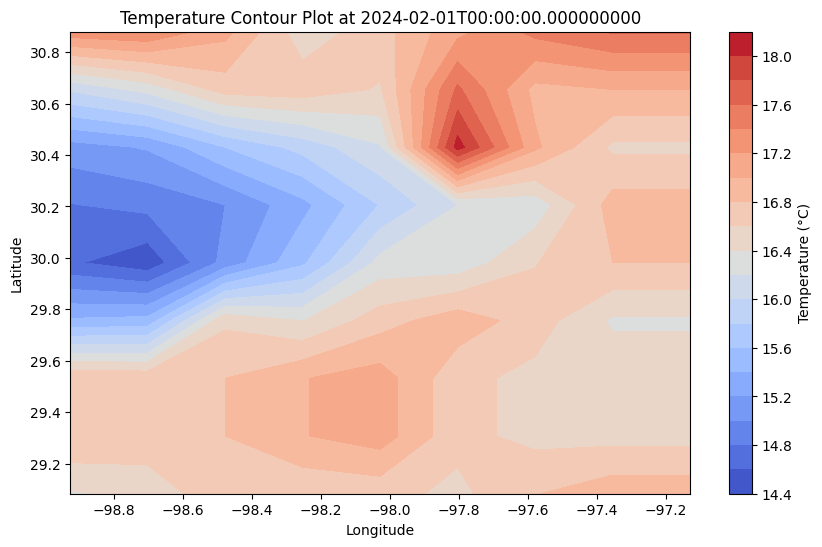

In [ ]:
time_index = 0
data_slice = region_data.isel(time=time_index)

lons = data_slice['x'].values
lats = data_slice['y'].values
data_values = data_slice.values

plt.figure(figsize=(10, 6))
plt.contourf(lons, lats, data_values, cmap="coolwarm", levels=20)
plt.colorbar(label="Temperature (°C)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Temperature Contour Plot at {data_slice.time.values}")
plt.show()

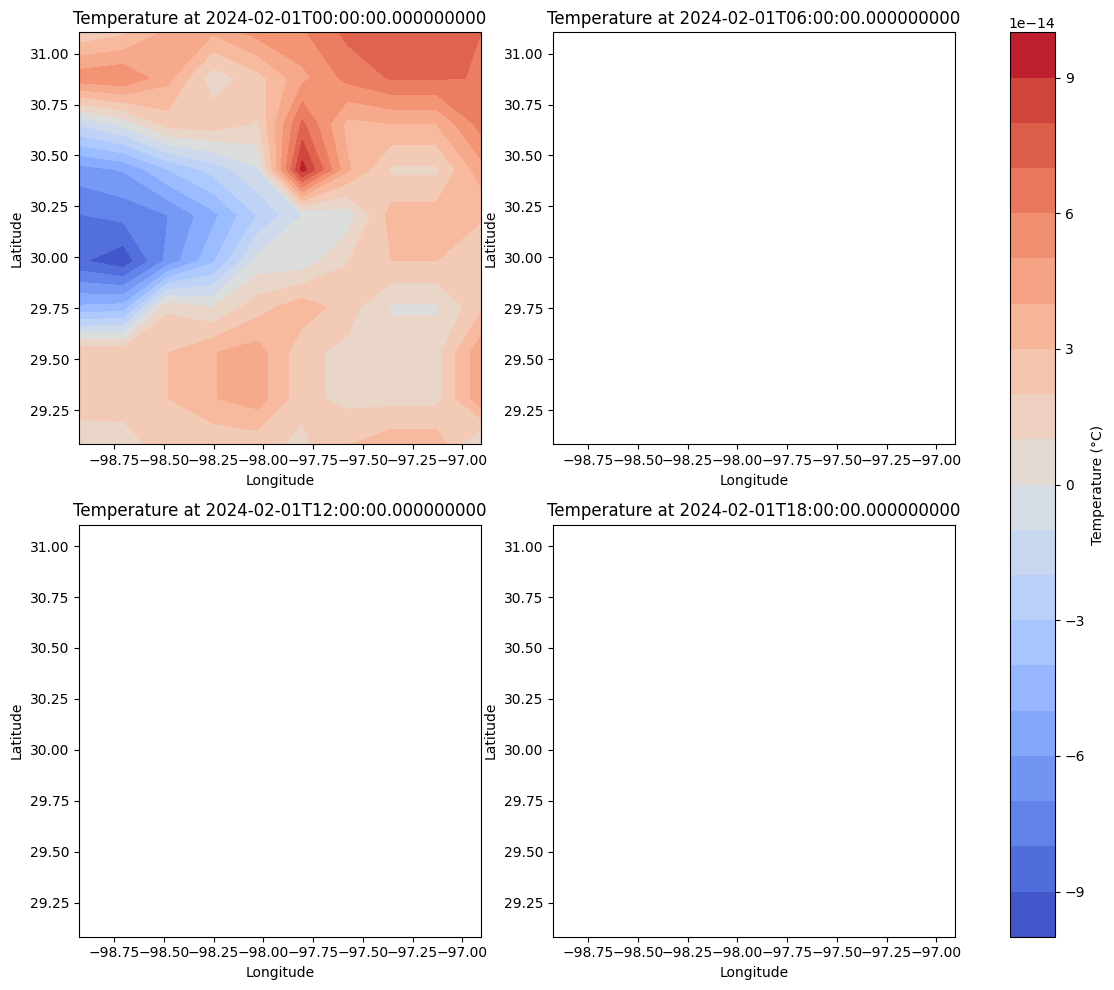

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axes.flat):
    data_slice = ds['temperature_2m_above_ground'].isel(time=i)
    c = ax.contourf(data_slice['x'], data_slice['y'], data_slice, cmap="coolwarm", levels=20)
    
    ax.set_title(f"Temperature at {data_slice.time.values}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

plt.tight_layout()
plt.colorbar(c, ax=axes.ravel().tolist(), label="Temperature (°C)")  
plt.show()

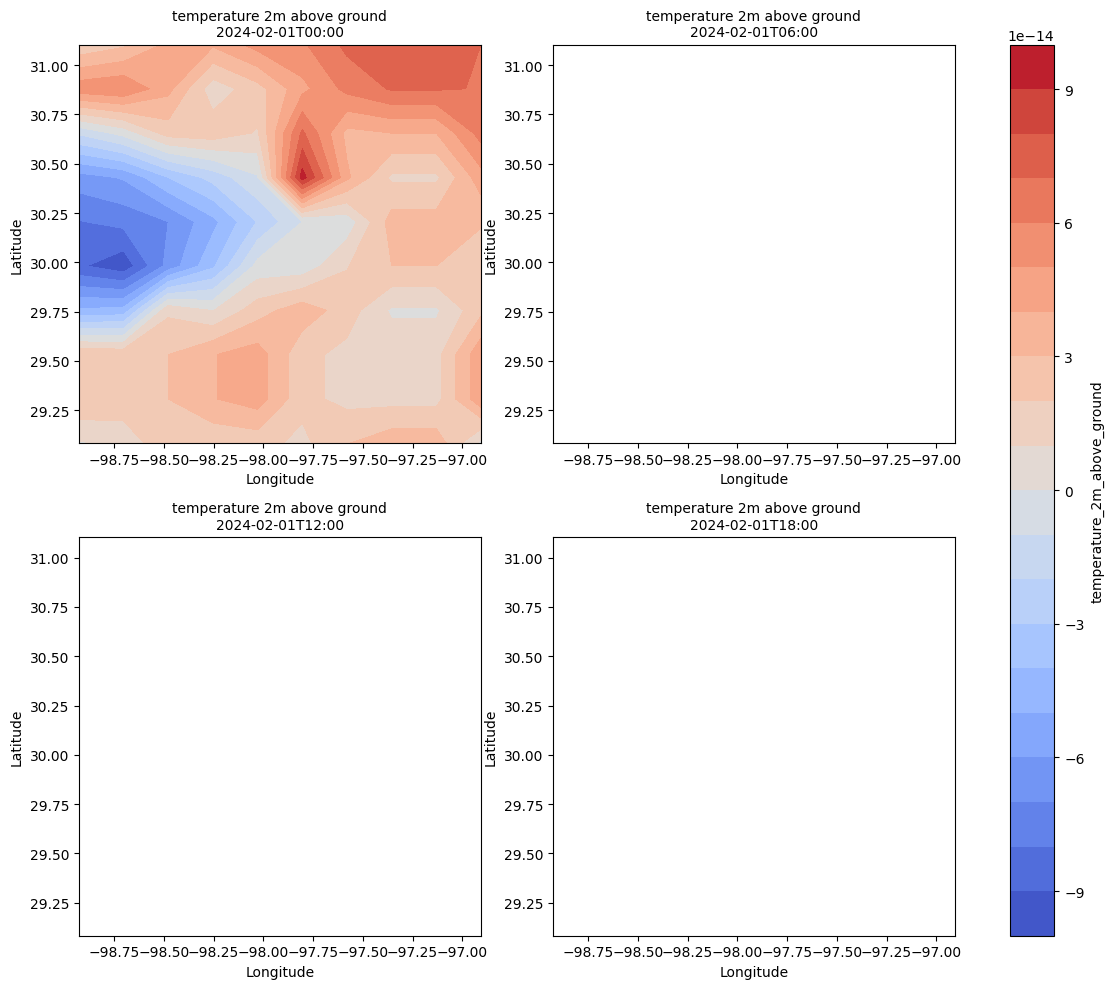

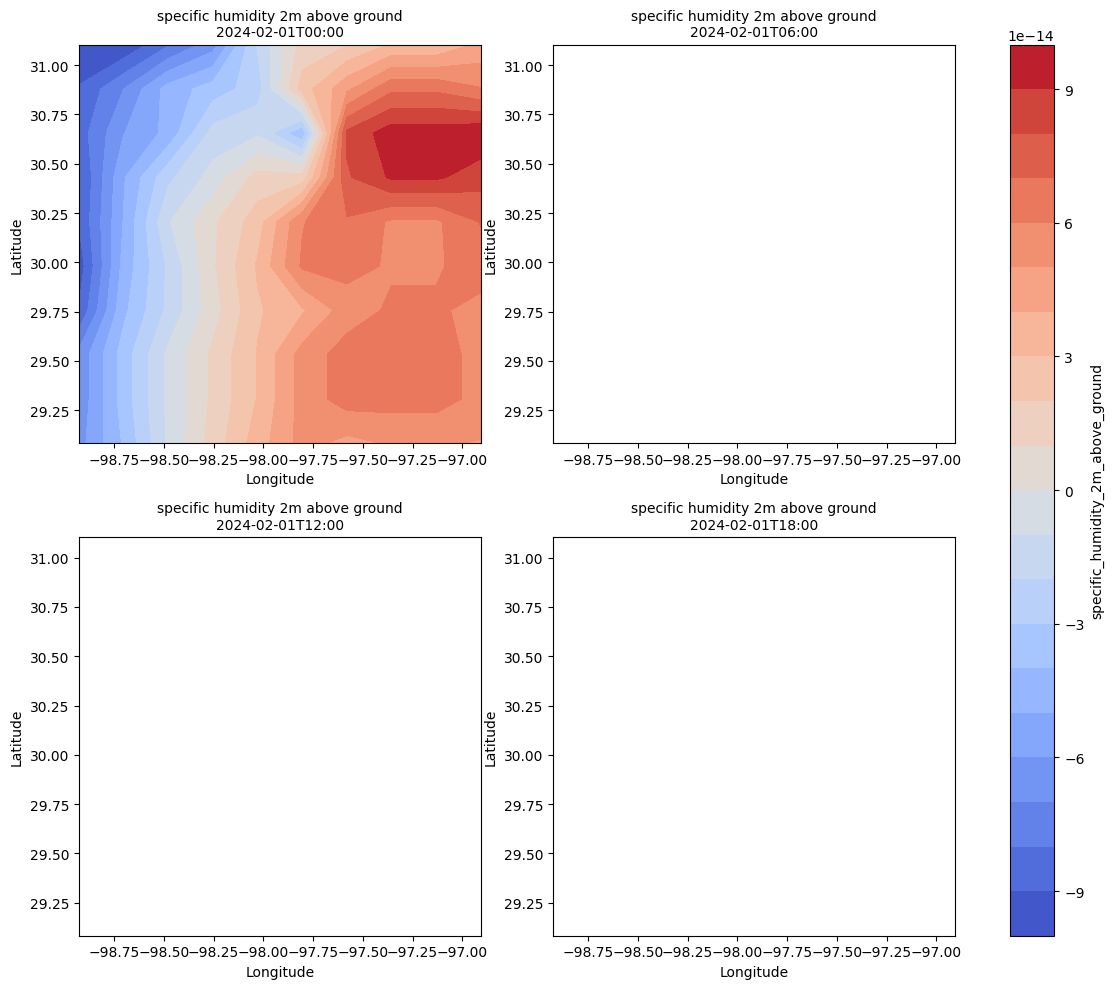

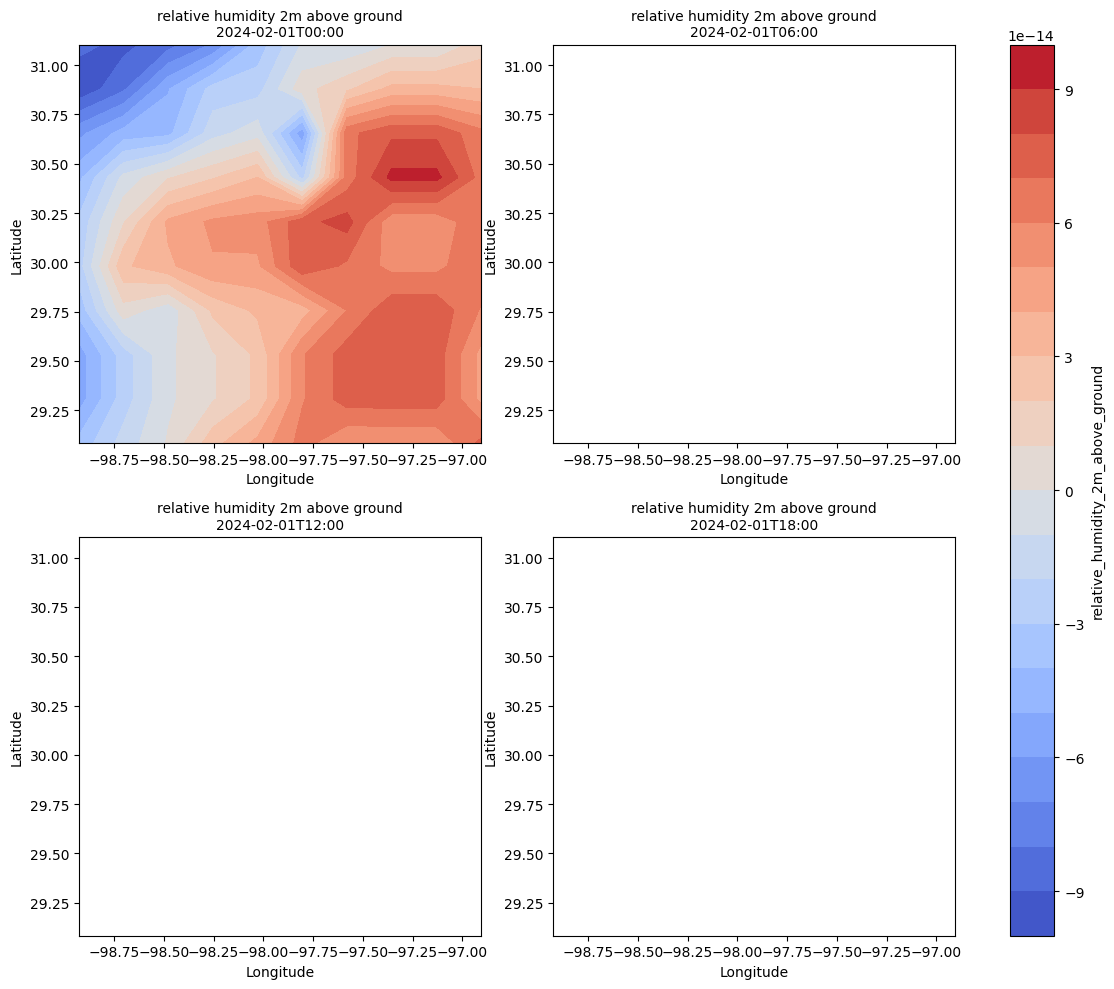

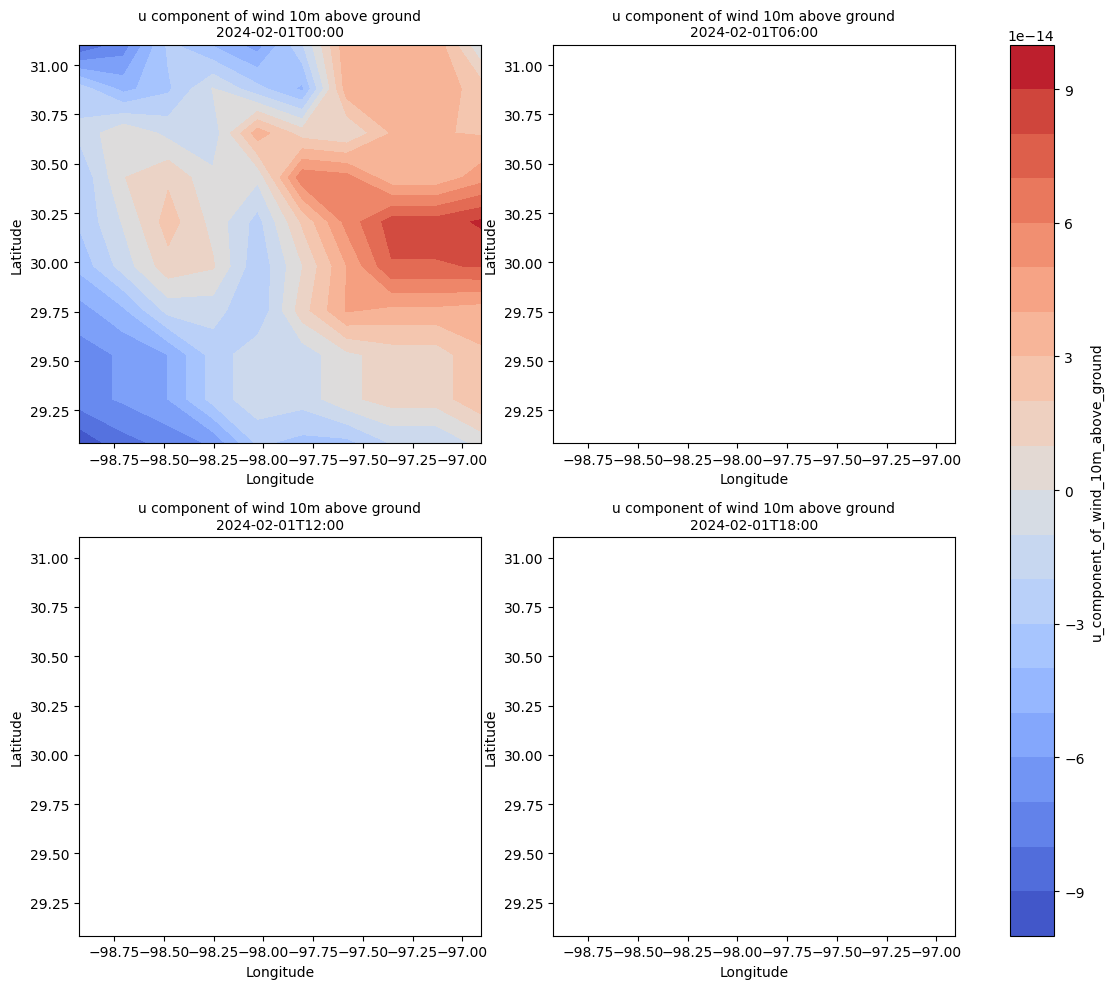

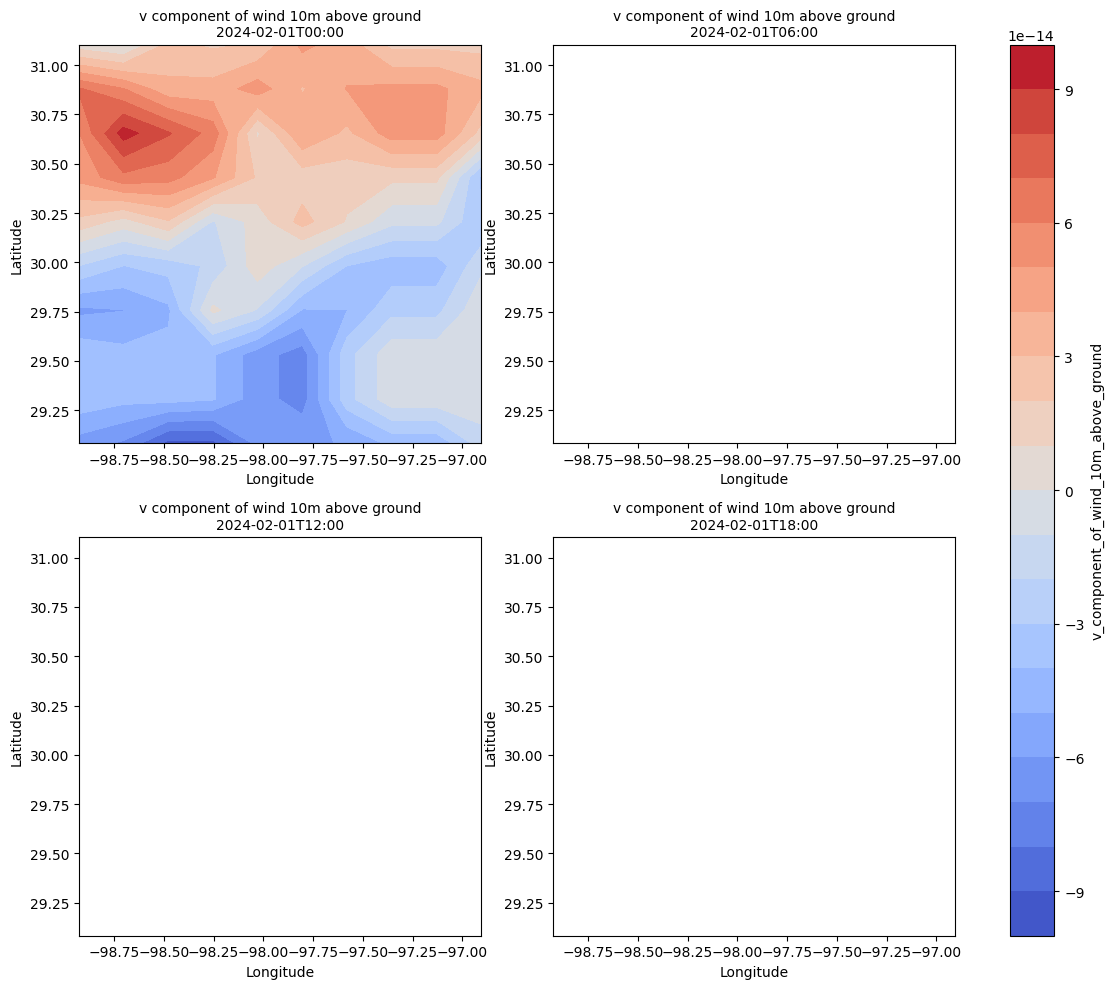

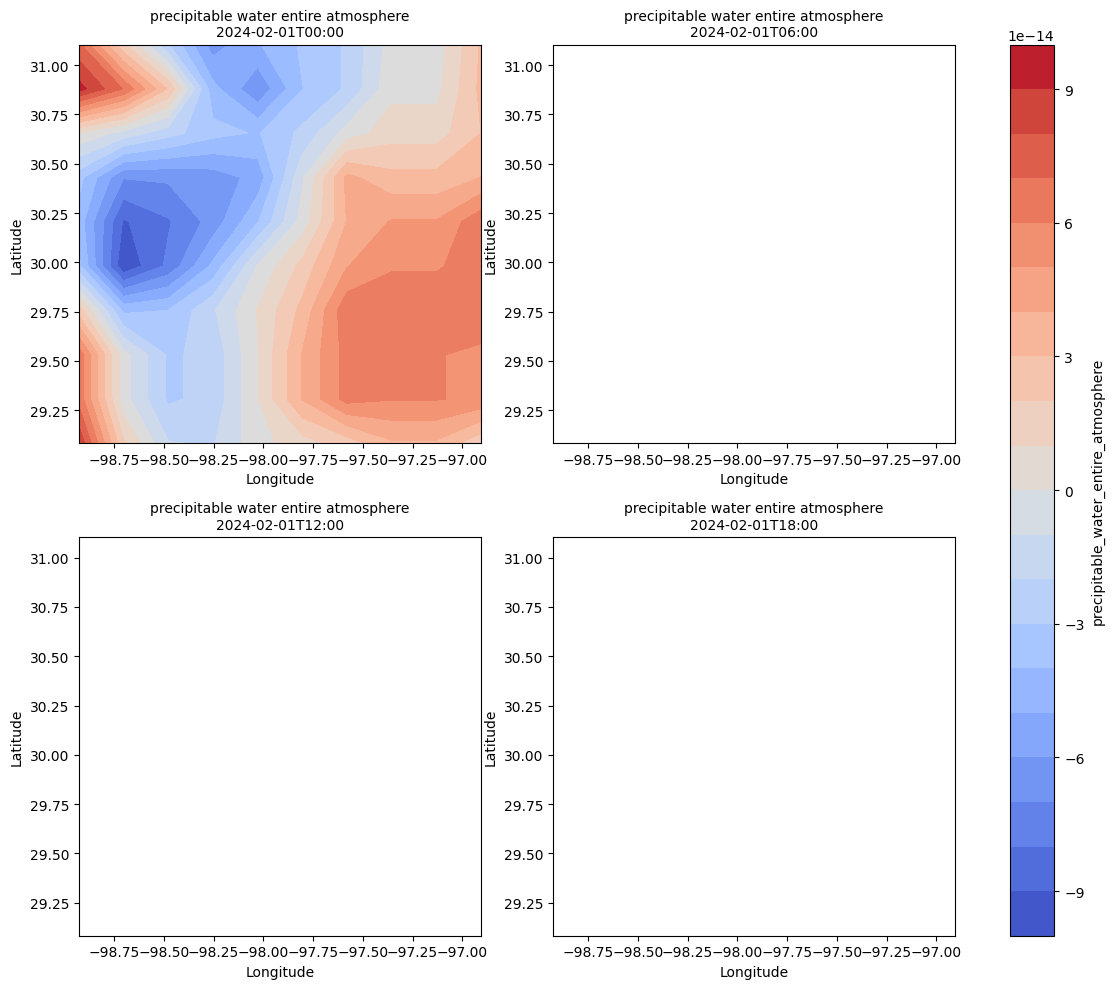

In [ ]:
for var in surface_variables:
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    for i, ax in enumerate(axes.flat):
        data_slice = ds[var].isel(time=i)


        c = ax.contourf(data_slice['x'], data_slice['y'], data_slice, cmap="coolwarm", levels=20)


        timestamp = str(data_slice.time.values)[:16]
        
        ax.set_title(f"{var.replace('_', ' ')}\n{timestamp}", fontsize=10)

        ax.set_xlabel("Longitude")
        ax.set_ylabel("Latitude")

    plt.tight_layout()
    fig.colorbar(c, ax=axes.ravel().tolist(), label=var)

    plt.show()
